## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.


В рамках исследования нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю.


Данные опубликованны на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    df_movies = pd.read_csv('/datasets/mkrf_movies.csv') 
    df_shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    df_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv') 
    df_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

In [3]:
df_movies.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
df_shows.head(3)

,puNumber,box_office
0,111000113,2450.0
1,111000115,61040.0
2,111000116,153030013.4


In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Для объединения датафреймов необходимо, чтобы типы данных столбца, по которому мы объединяем, совпадали. Сейчас типы столбца puNumber это object и int64.


При попытке преобразования типа данных столбца 'puNumber' в int возникает ошибка.

df_movies['puNumber'] = df_movies['puNumber'].astype('int64')

ValueError: invalid literal for int() with base 10: 'нет'

In [7]:
df_movies['puNumber'].sort_values().unique() # посмотрим на уникальные значения столбца

array([' 111004112', '111000110', '111000111', ..., '231001012',
       '231001111', 'нет'], dtype=object)

Ошибка возникает потому, что одно значение 'нет' не может быть переведено в int.
В принципе можно удалить эту строку, но так как в задании требуется чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм, то присвоим строке 'нет' любое числовое значение, которое не может встретится, например -1

In [8]:
df_movies.loc[df_movies['puNumber'] == 'нет', 'puNumber'] = '-1'

In [9]:
df_movies['puNumber'].sort_values().unique() # проверим замену

array([' 111004112', '-1', '111000110', ..., '226019110', '231001012',
       '231001111'], dtype=object)

In [10]:
df_movies['puNumber'] = df_movies['puNumber'].astype('int64') # проведем преобразование в целочисленный тип

In [11]:
df_movies['puNumber'].dtype # проверим преобразование

dtype('int64')

In [12]:
df_movies.shape

(7486, 15)

In [13]:
df_shows.shape

(3158, 2)

In [14]:
df = df_movies.merge(df_shows, on='puNumber', how='left') # объединим таблицы

In [15]:
df.info() # проверим объединение

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [16]:
df_movies.shape

(7486, 15)

In [17]:
df_shows.shape

(3158, 2)

In [18]:
df.shape

(7486, 16)

Объединение прошло успешно. Количество строк не увеличилось, а количество столбцов увеличилось на 1. Добавленный столбец box_office имеет тот же размер.

In [19]:
# переменуем 1 столбец
df = df.rename(columns={'puNumber': 'pu_number'})

**Выводы**

Мы прочитали данные из двух датафреймов, изменили тип данных для объединения и объединили два датафрейма. Получили первую информацию о данных. Видим, что есть пропущенные данные и данные с несоответствующими типами данных. На следующем этапе мы проведем предобработку данных и подготовим их для анализа.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Из всех столбцов необходимо поменять тип данных в следующих столбцах:

- столбец 'show_start_date' необходимо преобразовать в дату
- столбец 'ratings' по смыслу должен иметь тип float


выполним преобразования

In [20]:
df['show_start_date'] = pd.to_datetime(df['show_start_date']) # преобразование в дату

In [21]:
df['show_start_date'].dtype

datetime64[ns, UTC]

Столбец 'ratings' не преобразовывается в тип float. Это связано с тем, что часть данных записана в виде процентов. Пока оставим столбец без преобразования.

In [22]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [23]:
df.isna().sum() # посчитаем количество пропусков

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Столбец 'film_studio'. На данном этапе не видно оснований для заполнения пропусков.

In [24]:
# выделим фильмы, у которых есть пропуск в поле названия студии:
missing_id = df.query('film_studio != film_studio')['title'].unique()

# посмотрим, а есть ли такие записи для этих фильмов без пропусков названия студии:
df.query('film_studio == film_studio and title in @missing_id')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Таких записей нет.

In [25]:
df.loc[df['production_country'].isna()] # посмотрим на пропуски столбца production_country

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Пропуски в столбце 'production_country' очевидно можно заполнить. Страна производитель Россия. Выполним это.

In [26]:
df.loc[df['production_country'].isna(), 'production_country'] = 'Россия'

In [27]:
df.loc[df['production_country'].isna()] # проверим

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Не видно каких-либо оснований для заполнения пропусков в следующих столбцах: 'director', 'producer', 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source', 'ratings', 'genres', 'box_office'.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [28]:
df.duplicated().sum() # посчитаем количество явных дубликатов

0

**Столбец 'pu_number'**

In [29]:
df['pu_number'].duplicated().sum()

2

По смыслу столбец 'pu_number' должен быть уникальным, но здесь есть 2 дубликата. Посмотрим на эти строки.

In [30]:
df['pu_number'].value_counts().head() # найдем эти номера прокатных удостоверений

pu_number
221054410    2
221154310    2
221048915    1
121004611    1
121014411    1
Name: count, dtype: int64

In [31]:
df.loc[df['pu_number'].duplicated()] # также можно для этого применить метод duplicated

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [32]:
df.query('pu_number == 221054410')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Это два разных фильма. Удалять какой-либо нет оснований.

In [33]:
df.query('pu_number == 221154310')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


Это также два разных фильма. Удалять какой-либо нет оснований. 

**Столбец 'title'**

In [34]:
df['title'].duplicated().sum()

714

Дубли в этом столбце нормальное явление, т.к. названия фильмов могут совпадать.

**Столбец 'type'**

In [35]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [36]:
df['type'] = df['type'].str.strip() # избавимся от неявных дублей, связанных с пробелом в начале (конце) строки

In [37]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

**Столбец 'production_country'**

In [38]:
# посмотрим на уникальные значения столбца 'production_country'
df['production_country'].sort_values().unique()

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

Какие мы видим проблемы в этих данных? Где-то в качестве разделителя слов используется дефис, а где-то - запятая. Разное количество пробелов в строках между словами и дефисом.

In [39]:
# посчитаем количество уникальных данных в столбце
temp = len(df['production_country'].sort_values().unique())
temp

950

Удалим пробелы, запятую заменим на дефис.

In [40]:
# удаление пробелов с начала и конца строки
df['production_country'] = df['production_country'].str.strip()
# замена множественных пробелов внутри строки на пустую строку
df['production_country'] = df['production_country'].str.replace(r'\s+', '', regex=True)
# замена запятых на дефис
df['production_country'] = df['production_country'].str.replace(',', '-', regex=True)

In [41]:
df['production_country'].sort_values().unique()

array(['2019', 'CША', 'Австралия', 'Австралия-Великобритания',
       'Австралия-Великобритания-Бельгия-Индия', 'Австралия-Германия',
       'Австралия-Ирландия', 'Австралия-Канада', 'Австралия-Колумбия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия-Великобритания-Германия', 'Австрия-Германия',
       'Австрия-Германия-Франция', 'Австрия-Люксембург',
       'Австрия-Франция-Германия', 'Азербайджан-Россия', 'Аргентина',
       'Аргентина-Бразилия', 'Аргентина-Испания',
       'Аргентина-Испания-Уругвай',
       'Аргентина-Мексика-Бразилия-Франция-США',
       'Аргентина-Уругвай-Россия-Германия-Франция-Нидерланды',
       'Аргентина-Франция-Испания', 'Армения', 'Армения-Германия',
       'Армения-Казахстан', 'Армения-Россия', 'Бельгия',
       'Бельгия-Великобритания-США',
       'Бельгия-Германия-Канада-Франция-США-Великобритания',
       'Бельгия-Германия-Люксембург',
       'Бельгия-Германия-Люксембург-Франция',
       'Бельгия-Испания-Канада-Нидерланды',

In [42]:
len(df['production_country'].sort_values().unique())

812

In [43]:
print(f'количество неявных дублей в столбце "production_country" уменьшилось на {temp - len(df["production_country"].sort_values().unique())}')

количество неявных дублей в столбце "production_country" уменьшилось на 138


**Столбец 'director'**

In [44]:
df['director'].sort_values().unique()

array([' Йохан Нийенхейс', ' Н.Орлов, Р.Быков', ' Р.Асхаев', ...,
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона',
       nan], dtype=object)

In [45]:
# избавимся от дубля, связанного с различным написание фамилии
df['director'] = df['director'].str.replace('хореография Фредерика Аштона', 'хореография Фредерика Эштона')

In [46]:
df['director'].sort_values().unique()

array([' Йохан Нийенхейс', ' Н.Орлов, Р.Быков', ' Р.Асхаев', ...,
       'хореография Пьера Лакотта по Филиппу Тальони',
       'хореография Фредерика Эштона', nan], dtype=object)

Последовательно применим методы str.strip() и str.lower() и проконтролируем изменение количества неявных дублей

In [47]:
len(df['director'].unique())

4811

In [48]:
df['director'] = df['director'].str.strip()

In [49]:
len(df['director'].unique())

4801

In [50]:
df['director'] = df['director'].str.lower() 

In [51]:
len(df['director'].unique())

4796

Мы удалили дубли, связанные с регистром и пробелом в начале (конце) строки.

**Столбец 'producer'**

Последовательно применим методы str.strip() и str.lower() и проконтролируем изменение количества неявных дублей

In [52]:
len(df['producer'].unique())

5350

In [53]:
df['producer'] = df['producer'].str.lower() 

In [54]:
len(df['producer'].unique())

5343

In [55]:
df['producer'] = df['producer'].str.strip()

In [56]:
len(df['producer'].unique())

5327

В столбце 'producer' удалено 23 дубля, связанных с регистром и пробелом в начале (конце) строки.

**Столбец 'age_restriction'**

In [57]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

В столбце 'age_restriction' дублей нет.

**Столбец 'genres'**

In [58]:
len(df['genres'].unique())

743

In [59]:
df['genres'] = df['genres'].str.strip().str.lower() 

In [60]:
len(df['genres'].unique())

743

В столбце 'genres' дублей, связанных с пробелом в начале (конце) строки и регистром, не оказалось.

**Выводы**

В большинстве категориальных столбцов были удалены дубли, связанные с пробелом в начале (конце) строки и регистром. Это массовое явление. Причина дублей, скорее всего, это ошибки людей при заполнении данных и не "строгие" формы заполнения.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

Категориальные столбцы были рассмотрены при изучении дубликатов и исправлены некоторые проблемы. Общая проблема, которая встречается почти во всех категориальных столбцах - это пробелы в начале или конце строки и написание одних и тех же слов в разном регистре.


Кроме этого в категориальных столбцах встречаются следующие проблемы:
- наличие в некоторых словах знака "нижнее подчеркивание"
- различное написание одних и тех же иностранных слов кирилицей
- написание слов через дефис с пробелом и без пробела.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Столбец **budget** уже включает в себя полный объём государственной поддержки, т.е. он не может быть меньше, чем сумма столбцов **refundable_support** и **nonrefundable_support**. Проверим это.

In [61]:
# найдём записи,где бюджет меньше, чем объём господдержки
df.loc[df['budget'] < (df['refundable_support'] + df['nonrefundable_support'])]\
[['refundable_support', 'nonrefundable_support', 'budget']]

,refundable_support,nonrefundable_support,budget
2053,0.0,23000000.0,0.0
2058,0.0,75000000.0,0.0
2472,10000000.0,70000000.0,0.0
2532,20000000.0,0.0,0.0
2615,60000000.0,100000000.0,0.0
2684,0.0,59000000.0,0.0
2788,0.0,35000000.0,0.0
2874,0.0,6000000.0,0.0
3047,19000000.0,51000000.0,0.0
3565,0.0,250000000.0,0.0


In [62]:
len(df.loc[df['budget'] <= (df['refundable_support'] + df['nonrefundable_support'])]\
[['refundable_support', 'nonrefundable_support', 'budget']])

17

Это недостоверные данные. Но заполнять столбец budget суммой столбцов refundable_support и nonrefundable_support не целесообразно, это искажение данных.


Подозрительных данных немного и их можно удалить, т.к их использование изменит результат (при делении господдержки на бюджет мы получим завышенную долю господдержки).

In [63]:
df.shape

(7486, 16)

In [64]:
df = df.query('budget != 0') # удалим эти строки 

In [65]:
df.shape

(7469, 16)

**Столбец refundable_support**

In [66]:
df['refundable_support'].describe()

count    3.150000e+02
mean     1.160317e+07
std      2.515144e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64

In [67]:
df['refundable_support'].value_counts().reset_index().sort_values(by = 'refundable_support', ascending=True)

,refundable_support,count
0,0.0,214
14,3500000.0,1
1,5000000.0,9
23,7000000.0,1
25,7153119.0,1
22,7346881.0,1
21,8000000.0,1
32,9000000.0,1
5,10000000.0,8
2,15000000.0,9


In [68]:
sns.set_theme()
sns.set_context("paper")

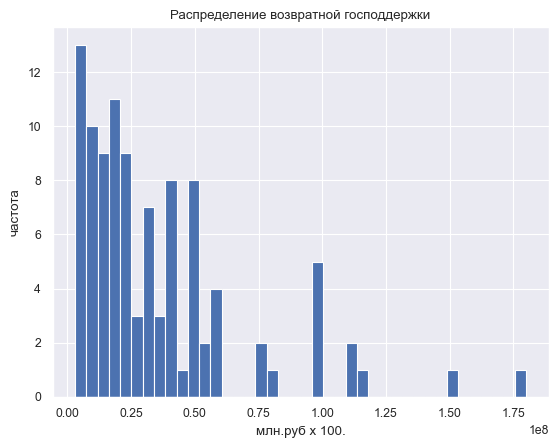

In [69]:
df['refundable_support'].hist(range=(3_000_000, 180_000_000), bins=40)
plt.xlabel('млн.руб х 100.')
plt.ylabel('частота')
plt.title('Распределение возвратной господдержки');

Минимальное значение (для фильмов получивших возвратную поддержку) составляет 3.5 млн.руб. Большая часть данных столбца refundable_support не превышает 25 млн. руб., но есть отдельные фильмы, которые получают возвратную поддержку в размере 150 и 180 млн.руб.
В целом данные выглядят достоверными.

**Столбец nonrefundable_support**

In [70]:
df['nonrefundable_support'].describe()

count    3.150000e+02
mean     4.810704e+07
std      5.988614e+07
min      0.000000e+00
25%      2.500000e+07
50%      3.000000e+07
75%      4.000000e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64

In [71]:
df['nonrefundable_support'].value_counts().reset_index().sort_values(by = 'nonrefundable_support', ascending=True)

,nonrefundable_support,count
8,0.0,8
70,3000000.0,1
65,4700000.0,1
15,5000000.0,3
66,5300000.0,1
...,...,...
20,250000000.0,2
30,260000000.0,1
23,300000000.0,2
61,392104482.0,1


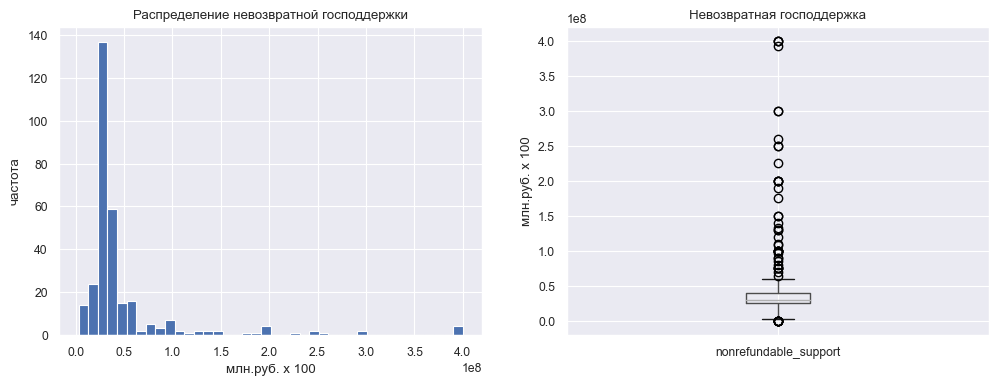

In [72]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
df['nonrefundable_support'].hist(range=(3_000_000, 400_000_000), bins=40)
plt.xlabel('млн.руб. х 100')
plt.ylabel('частота')
plt.title('Распределение невозвратной господдержки');
plt.subplot(122)
df.boxplot('nonrefundable_support')
plt.ylabel('млн.руб. х 100')
plt.title('Невозвратная господдержка');

В целом данные выглядят достоверными. Минимальное значение (для фильмов получивших невозвратную поддержку) составляет 3.0 млн.руб. Большая часть данных столбца nonrefundable_support не превышает 30 млн. руб., но есть отдельные фильмы, которые получают невозвратную поддержку в размере 400 млн.руб.

Посмотрим что это за фильмы.

In [73]:
df.query('nonrefundable_support > 390_000_000')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2920,Экипаж .,111005416,2016-03-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,н.лебедев,"л.верещагин, а.златопольский, н.михалков, ооо ...",«6+» - для детей старше 6 лет,50000000.0,392104482.0,635283867.0,Фонд кино,7.6,"драма,триллер,приключения",1.402255e+09
5653,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,а.мегердичев,"л.верещагин, а.златопольский, н.михалков, ооо ...",«6+» - для детей старше 6 лет,0.0,400000000.0,590192191.0,Фонд кино,7.5,"спорт,драма",2.779686e+09
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,а.кравчук,"а.максимов, к.эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,ф.бондарчук,"ф.бондарчук, м.врубель, а.андрющенко, д.рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN


2 из 4-х фильмов, получивших невозвратную господдержку более 390 млн.руб., это фильмы Студии "ТРИТЭ" Никиты Михалкова.

**Столбец budget**

In [74]:
df['budget'].describe()

count    3.150000e+02
mean     1.340961e+08
std      1.912260e+08
min      1.446246e+07
25%      4.615387e+07
50%      7.337955e+07
75%      1.500043e+08
max      2.305074e+09
Name: budget, dtype: float64

In [75]:
df['budget'].value_counts().reset_index().sort_values(by = 'budget', ascending=True)

,budget,count
287,1.446246e+07,1
103,1.501000e+07,1
48,1.816642e+07,1
62,1.870608e+07,1
173,2.700000e+07,1
...,...,...
112,7.799420e+08,1
59,9.440000e+08,1
69,9.800000e+08,1
70,1.032906e+09,1


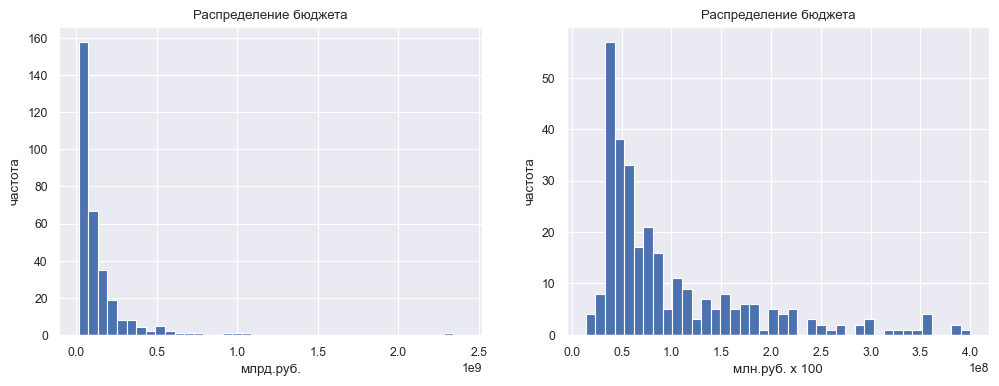

In [76]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
df['budget'].hist(range=(14_000_000, 2_400_000_000), bins=40)
plt.xlabel('млрд.руб.')
plt.ylabel('частота')
plt.title('Распределение бюджета');
plt.subplot(122)
df['budget'].hist(range=(14_000_000, 400_000_000), bins=40)
plt.xlabel('млн.руб. х 100')
plt.ylabel('частота')
plt.title('Распределение бюджета');

В целом данные выглядят достоверными. Минимальное значение составляет 14.5 млн.руб. Большая часть данных столбца budget не превышает 74 млн. руб., но есть отдельные фильмы, которые имеют бюджеты боле одного и более двух млрд.руб.

Посторим что это за фильмы с аномально высокими бюджетами.

In [77]:
df.query('budget > 590_000_000').sort_values(by = 'budget', ascending = False)\
[['title', 'film_studio', 'budget', 'box_office', 'ratings', 'director']]

,title,film_studio,budget,box_office,ratings,director
7114,Тайна Печати Дракона,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",2.305074e+09,3.335971e+08,5.8,о.степченко
5437,Матильда,"ООО ""ТПО ""РОК"", ООО ""Матильда""",1.032906e+09,5.117755e+08,7.7,а.учитель
7464,Союз спасения,"ЗАО ""Дирекция кино""",9.800000e+08,7.177032e+08,6.0,а.кравчук
7474,Вторжение,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",9.440000e+08,NaN,5.7,ф.бондарчук
7171,Грех,НО Фонд Андрея Кончаловского по поддержке кино...,7.799420e+08,5.424320e+07,6.9,а.михалков (псевдоним а.кончаловский)
3351,Дуэлянт,"ООО ""Нон-Стоп Продакшн""",6.842005e+08,3.642851e+08,6.6,а.мизгирев
2920,Экипаж .,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",6.352839e+08,1.402255e+09,7.6,н.лебедев
5653,Движение вверх,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",5.901922e+08,2.779686e+09,7.5,а.мегердичев


**Столбец box_office**

In [78]:
df['box_office'].describe()

count    3.141000e+03
mean     7.600967e+07
std      2.402503e+08
min      0.000000e+00
25%      8.395000e+04
50%      2.284862e+06
75%      2.344112e+07
max      3.073569e+09
Name: box_office, dtype: float64

In [79]:
df['box_office'].value_counts().reset_index().sort_values(by = 'box_office', ascending=True)

,box_office,count
0,0.000000e+00,24
1981,4.000000e+01,1
1505,5.000000e+01,1
446,7.500000e+01,1
1944,8.000000e+01,1
...,...,...
2553,2.118396e+09,1
1445,2.271754e+09,1
1398,2.576614e+09,1
235,2.779686e+09,1


Данные о сборах вызывают вопросы. Большая часть фильмов имеет нереально низкие сборы. Так 25% фильмов (785 шт.) имеют сборы менее 84 тыс. руб. 1258 фильмов имеют сборы менее 1 млн.руб. 50% фильмов имеют сборы менее 2.3 млн.руб. Такие данные нельзя считать достоверными.

In [80]:
# посмотрим на фильмы со сборами менее 1 млн. руб.
df.query('box_office < 1_000_000').sort_values(by = 'box_office', ascending = False)\
[['title', 'film_studio', 'budget', 'box_office', 'ratings', 'director']]

,title,film_studio,budget,box_office,ratings,director
2703,"Не видать нам Париж, как своих ушей","Бифрост Пикчерз, Бридж Файненс Компани, У2Би К...",NaN,996669.0,4.8,"жослин таун, саймон хелберг"
6546,Клод Моне: Магия воды и света,Балланди АртсНексо Диджитал,NaN,991888.0,NaN,джованни троило
3079,Тронутые (2014),"Амейша Интертейнмент, Тройка Пикчерз, Куп ди Э...",NaN,991582.0,7.1,грен уэллс
6032,Облепиховое лето,"ООО ""Кино-Арт"", АО ""ТПО ""СДФ""",37878787.0,988413.0,6.3,в.алфёров
3624,Неизвестная,"Ле Фильм дю Флёв, Саваж Фильм",NaN,988205.5,6.0,"жан-пьер дарденн, люк дарденн"
...,...,...,...,...,...,...
976,Гарегин Нжде,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",NaN,0.0,7.9,грач кешишян
933,Летние войны,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",NaN,0.0,7.7,мамору хосода
932,Письмо для Момо,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",NaN,0.0,7.4,окиура хироюки
914,В тумане /По одноименной повести Василя Быкова/,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...",NaN,0.0,6.5,сергей лозница


В основном это зарубежные фильмы.

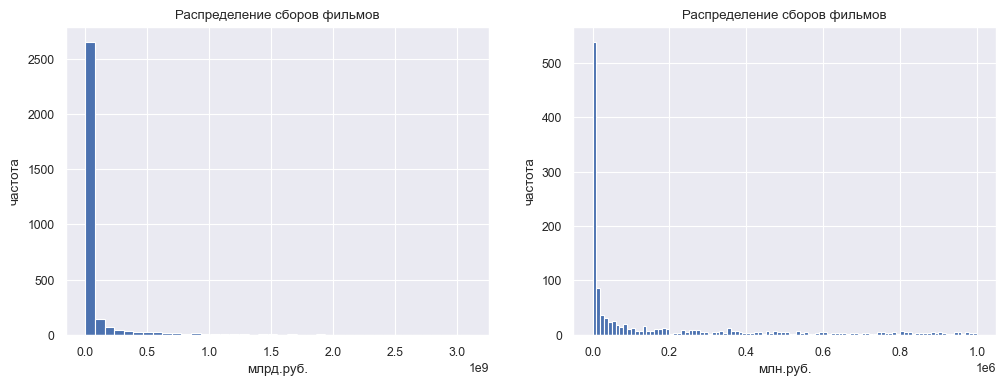

In [81]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
df['box_office'].hist(range=(0, 3_100_000_000), bins=40)
plt.xlabel('млрд.руб.')
plt.ylabel('частота')
plt.title('Распределение сборов фильмов');
plt.subplot(122)
df['box_office'].hist(range=(0, 1_000_000), bins=100)
plt.xlabel('млн.руб.')
plt.ylabel('частота')
plt.title('Распределение сборов фильмов');

Посмотрим на сборы фильмов с господдержкой.

In [82]:
df.query('budget > 0')['box_office'].describe()

count    3.010000e+02
mean     1.306983e+08
std      3.391903e+08
min      1.550000e+03
25%      1.067649e+06
50%      1.274840e+07
75%      1.031348e+08
max      3.073569e+09
Name: box_office, dtype: float64

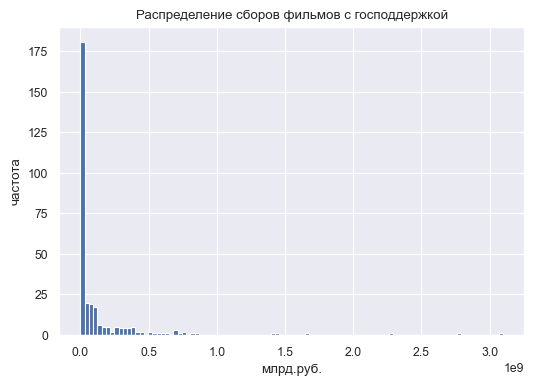

In [83]:
fig, ax = plt.subplots(figsize=(6, 4))
df.query('budget > 0')['box_office'].hist(range=(0, 3_100_000_000), bins=100)
ax.set(title = 'Распределение сборов фильмов с господдержкой', xlabel = 'млрд.руб.', ylabel = 'частота');

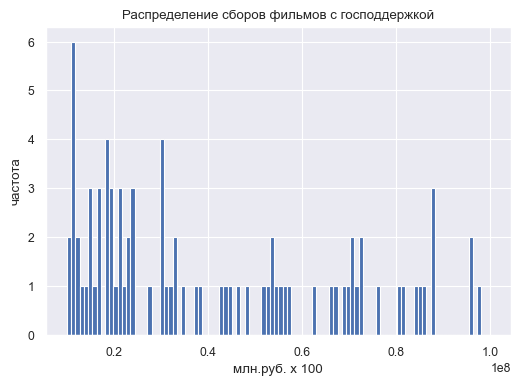

In [84]:
fig, ax = plt.subplots(figsize=(6, 4))
df.query('budget > 0')['box_office'].hist(range=(10_000_000, 100_000_000), bins=100)
ax.set(title = 'Распределение сборов фильмов с господдержкой', xlabel = 'млн.руб. х 100', ylabel = 'частота');

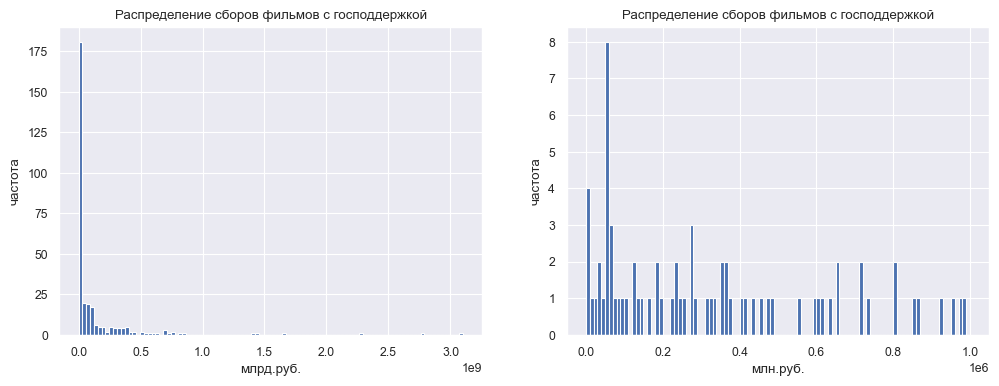

In [85]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
df.query('budget > 0')['box_office'].hist(range=(0, 3_100_000_000), bins=100)
plt.xlabel('млрд.руб.')
plt.ylabel('частота')
plt.title('Распределение сборов фильмов с господдержкой');
plt.subplot(122)
df.query('budget > 0')['box_office'].hist(range=(0, 1_000_000), bins=100)
plt.xlabel('млн.руб.')
plt.ylabel('частота')
plt.title('Распределение сборов фильмов с господдержкой');

Эти данные получше, но все равно имеют большое количество аномально низких значений. Так 25% фильмов имеют сборы менее 1.07 млн. руб., что представляется нереалистичным. Тем более учитывая, что минимальный бюджет фильма составляет 14.5 млн.руб.

Тем ни менее посмотрим на взаимозависимость бюджета и выручки, поищем какие-то аномальные значения. По логике фильмы с большим бюджетом должны приносить и большие сборы. Проверим эту гипотезу.

Построим диаграмму рассеивания: бюджет - сборы.

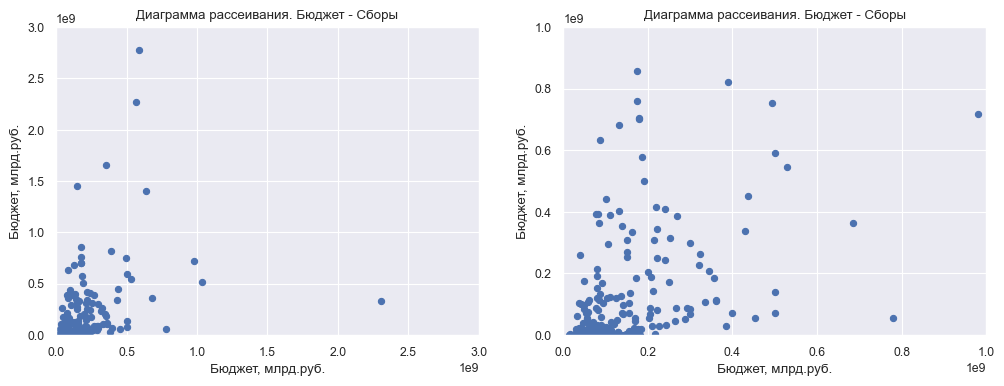

In [86]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
df[['budget', 'box_office']].plot(ax=ax[0], kind='scatter', x='budget', y='box_office', \
                                  xlim=(0, 3_000_000_000), ylim=(0, 3_000_000_000));
ax[0].set(title = 'Диаграмма рассеивания. Бюджет - Сборы', xlabel = 'Бюджет, млрд.руб.', ylabel = 'Бюджет, млрд.руб.')
df[['budget', 'box_office']].plot(ax=ax[1], kind='scatter', x='budget', y='box_office', \
                                  xlim=(0, 1_000_000_000), ylim=(0, 1_000_000_000));
ax[1].set(title = 'Диаграмма рассеивания. Бюджет - Сборы', xlabel = 'Бюджет, млрд.руб.', ylabel = 'Бюджет, млрд.руб.');

Посмотрим на коэффициент корреляции.

In [87]:
df[['budget', 'box_office']].corr()

,budget,box_office
budget,1.000000,0.375276
box_office,0.375276,1.000000


Есть слабая корреляция между бюджетом и сборами фильма.

Посмотрим на фильм с аномально высоким бюджетом.

In [88]:
df.query('budget > 2_000_000_000')[['title', 'film_studio', 'budget', 'box_office', 'ratings', 'director']]

,title,film_studio,budget,box_office,ratings,director
7114,Тайна Печати Дракона,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",2.305074e+09,3.335971e+08,5.8,о.степченко


Бюджет фильма превышает сборы почти в 7 раз. Рейтинг низкий - 5.8.

Посмотрим на фильмы с аномально высокими сборами.

In [89]:
df.query('box_office > 1_900_000_000').sort_values(by = 'box_office', ascending = False)\
[['title', 'film_studio', 'budget', 'box_office', 'ratings', 'director']]

,title,film_studio,budget,box_office,ratings,director
7456,Холоп,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",160000000.0,3.073569e+09,6.8,к.шипенко
5653,Движение вверх,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",590192191.0,2.779686e+09,7.5,а.мегердичев
6820,Мстители: Финал,Марвел Студиос,NaN,2.576614e+09,7.6,"джо руссо, энтони руссо"
6549,Т-34,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",563784717.0,2.271754e+09,6.5,а.сидоров
3488,Пираты Карибского моря: Мертвецы не рассказыва...,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",NaN,2.118396e+09,6.6,"йоаким реннинг, эспен сандберг"
2859,Зверополис,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",NaN,2.048126e+09,8.3,"рич мур, байрон ховард"
3755,Тайная жизнь домашних животных. Миньоны против...,"Иллюминейшн Интертейнмент, Юниверсал Пикчерз",NaN,1.971005e+09,6.7,крис рено
6274,Веном,"Коламбиа Пикчерз, Марвел Интертейнмент, Паскал...",NaN,1.913258e+09,6.8,рубен флейшер
7216,Малефисента: Владычица тьмы,"Рот Филмз, Уолт Дисней Пикчерз",NaN,1.911945e+09,6.9,йоаким роннинг


В Топ-4 три российских фильма.

**Выводы**

Количественные данные представляются достоверными за исключение столбца box_office. Вызывает  сомнение большое количество аномально низких сборов, эти данные сложно чем-то объяснить.

Существует слабая корреляция между бюджетом и сборами фильма.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [90]:
df['show_start_year'] = df['show_start_date'].dt.tz_localize(None).dt.to_period("Y")

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [91]:
def creating_column(row): # функция для одной строки для создания нового столбца
    return str(row['director']).split(',')[0]    

In [92]:
df['director_name'] = df.apply(creating_column, axis=1) # применим функцию

In [93]:
df['director_name'].head() # проверим преобразование

0        кевин костнер
1            е.матвеев
2    тимур бекмамбетов
3    тимур бекмамбетов
4    тимур бекмамбетов
Name: director_name, dtype: object

In [94]:
def creating_column(row):
    return str(row['genres']).split(',')[0]

In [95]:
df['main_genre'] = df.apply(creating_column, axis=1)

In [96]:
df['main_genre'].head() # проверим преобразование

0        боевик
1         драма
2    фантастика
3    фантастика
4    фантастика
Name: main_genre, dtype: object

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [97]:
(df['refundable_support'].sum() + df['nonrefundable_support'].sum()) / df['budget'].sum()

0.4452793662369939

Государственная поддержка в среднем составляет 44,5% от бюджета фильма (это средневзвешенное значение, которое зависит от величины бюджетов).

Посчитаем долю господдержки по каждому фильму и найдем среднее.

In [98]:
df['share_of_state_support'] = (df['refundable_support'] + df['nonrefundable_support'])\
/ df['budget'] # создадим такой столбец

In [99]:
df.query('budget > 0')['share_of_state_support'].describe() # посмотрим статистику

count    315.000000
mean       0.517386
std        0.170043
min        0.044043
25%        0.373458
50%        0.592265
75%        0.656931
max        0.784745
Name: share_of_state_support, dtype: float64

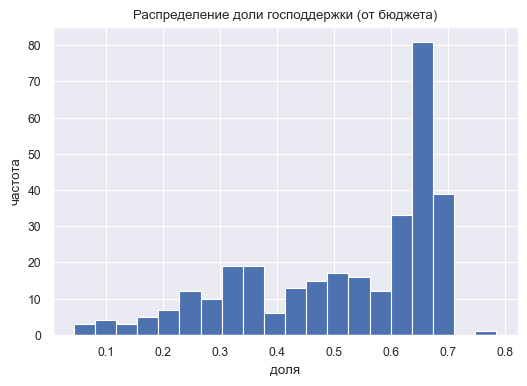

In [100]:
fig, ax = plt.subplots(figsize=(6, 4))
df.query('budget > 0')['share_of_state_support'].hist(bins=20); # посмотрим на распределение доли господдержки
ax.set(title = 'Распределение доли господдержки (от бюджета)', xlabel = 'доля', ylabel = 'частота');

Государственная поддержка в среднем составляет 51,7% от бюджета фильма, это среднее значение от доли поддержки по каждому фильму.

Посмотрим на таблицу после добавления новых столбцов 

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7469 entries, 0 to 7485
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   title                   7469 non-null   object             
 1   pu_number               7469 non-null   int64              
 2   show_start_date         7469 non-null   datetime64[ns, UTC]
 3   type                    7469 non-null   object             
 4   film_studio             7451 non-null   object             
 5   production_country      7469 non-null   object             
 6   director                7460 non-null   object             
 7   producer                6901 non-null   object             
 8   age_restriction         7469 non-null   object             
 9   refundable_support      315 non-null    float64            
 10  nonrefundable_support   315 non-null    float64            
 11  budget                  315 non-null    float64 

In [102]:
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_name,main_genre,share_of_state_support
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,кевин костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,е.матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,е.матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,тимур бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,тимур бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,тимур бекмамбетов,фантастика,NaN


Столбцы были добавлены корректно.

#### Выводы

В части предобработки данных мы выполнили следующее:

1. Проанализировали тип данных. Преобразовали типы данных: дата начала проката фильма - в тип дата; номер прокатного удостоверения в одной из таблиц - в целочисленный тип.


2. Проанализировали пропуски в данных. Оставили без заполнения те столбцы, заполнять которые не нашли оснований. Заполнили данные в столбце "production_country" очевидно правильным значением.


3. Проанализировали дубликаты. В большинстве категориальных столбцов были удалены дубли, связанные с пробелом в начале (конце) строки и регистром. Это массовое явление. Причина дублей, скорее всего, - это ошибки людей при заполнении данных и не "строгие" формы заполнения.


4. Проанализировали категориальные столбцы. Общая проблема, которая встречается почти во всех категориальных столбцах - это пробелы в начале или конце строки и написание одних и тех же слов в разном регистре. Кроме этого в категориальных столбцах встречаются следующие проблемы: наличие в некоторых словах знака "нижнее подчеркивание"; различное написание одних и тех же иностранных слов кирилицей; написание слов через дефис с пробелом и без пробела.


5. Проанализировали количественные столбцы. Обнаружили недостоверные данные в столбце "budget". Он уже включает в себя полный объём государственной поддержки и не может быть меньше, чем сумма столбцов refundable_support и nonrefundable_support. Количество таких данных составило 17 записей. Эти данные могли бы исказить результаты исследования и были удалены.


6. Добавили новые столбцы с использованием функции для одной строки и в итоге подготовили данные к исследованию.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Будем считать, что в прокат выходили все фильмы, которые имеют прокатные удостоверения. А данные о прокате в кинотеатрах известны только о тех фильмах, по которым есть данные о сборах.

In [103]:
df.groupby('show_start_year')['title'].nunique() # количество уникальных фильмов по годам

show_start_year
2010    818
2011    558
2012    556
2013    615
2014    765
2015    682
2016    779
2017    503
2018    880
2019    924
Freq: A-DEC, Name: title, dtype: int64

In [104]:
df.groupby('show_start_year')['title'].count() # количество не уникальных фильмов по годам

show_start_year
2010    985
2011    622
2012    593
2013    630
2014    806
2015    699
2016    815
2017    503
2018    887
2019    929
Freq: A-DEC, Name: title, dtype: int64

In [105]:
df.groupby('show_start_year')['box_office'].count() # количество фильмов по годам, по которым есть данные о сборах

show_start_year
2010    105
2011    109
2012    128
2013    184
2014    278
2015    459
2016    523
2017    355
2018    471
2019    529
Freq: A-DEC, Name: box_office, dtype: int64

In [106]:
df.groupby('show_start_year')['title'].count().sum()

7469

In [107]:
df.groupby('show_start_year')['box_office'].count().sum()

3141

In [108]:
# доля фильмов с указанной информацией о прокате в кинотеатрах
df.groupby('show_start_year')['box_office'].count().sum() / df.groupby('show_start_year')['title'].count().sum()

0.420538224661936

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [109]:
df.groupby('show_start_year')['box_office'].sum().reset_index().sort_values(by='box_office')

,show_start_year,box_office
0,2010,2.428654e+06
2,2012,6.955423e+06
1,2011,1.410276e+07
3,2013,2.979971e+07
4,2014,7.434718e+09
5,2015,3.852783e+10
6,2016,4.674232e+10
9,2019,4.827810e+10
7,2017,4.845815e+10
8,2018,4.925199e+10


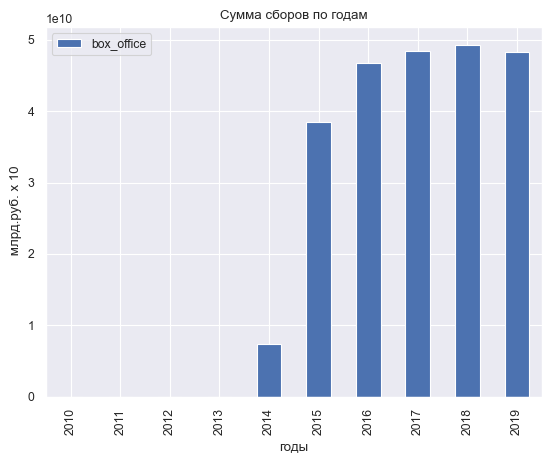

In [110]:
df.groupby('show_start_year')['box_office'].sum().reset_index().plot(kind= 'bar', x='show_start_year')
plt.xlabel('годы')
plt.ylabel(' млрд.руб. х 10')
plt.title('Cумма сборов по годам');

Динамика проката по годам (в части сборов от проката). Сумма сборов до 2014 года была очень низкой, затем резко выросла в 2014 и 2015 годах. Скорее всего это связано с учетом, ранее не все сборы учитывались, или учитывались в других единицах. Наверное именно это объясняет наличие большого количества аномально низких данных по сборам. Сборы в 2018 году превышают сборы 2010 года более чем в 20 тыс. раз. 


С 2016 по 2019 год сумма сборов существенно не менялась. Минимум был в 2010 году, максимум - в 2018. 

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [111]:
# средняя и медианная сумма сборов для каждого года
df.pivot_table(index='show_start_year', values='box_office', aggfunc=('count','mean', 'median'))\
.style.format({'mean' : '{:_.10}', 'median' : '{:_.10}'})

,count,mean,median
show_start_year,,,
2010,105,23_130.0381,1_700.0
2011,109,129_383.1651,3_000.0
2012,128,54_339.24219,5_660.0
2013,184,161_954.925,3_522.5
2014,278,26_743_589.36,18_137.5
2015,459,83_938_621.35,4_784_781.5
2016,523,89_373_453.67,3_776_087.56
2017,355,136_501_823.2,9_919_415.0
2018,471,104_568_983.9,8_751_895.75


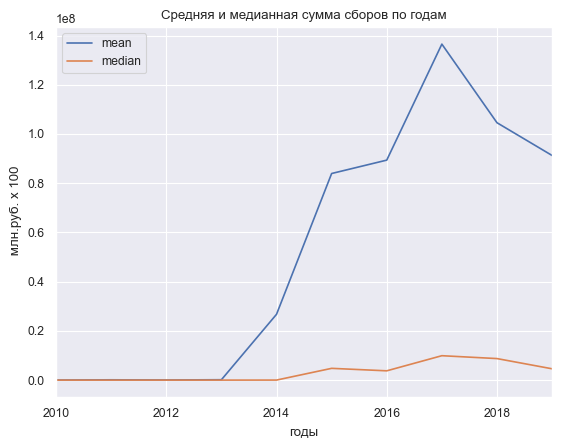

In [112]:
df.pivot_table(index='show_start_year', values='box_office', aggfunc=('mean', 'median')).plot()
plt.xlabel('годы')
plt.ylabel(' млн.руб. х 100')
plt.title('Cредняя и медианная сумма сборов по годам');

In [113]:
df.query('"2016" < show_start_year < "2018"')['box_office'].describe() 
# посмотрим на распределение сборов внутри характерного года (2017 год)

count    3.550000e+02
mean     1.365018e+08
std      3.241025e+08
min      7.900000e+03
25%      1.938366e+06
50%      9.919415e+06
75%      7.346440e+07
max      2.779686e+09
Name: box_office, dtype: float64

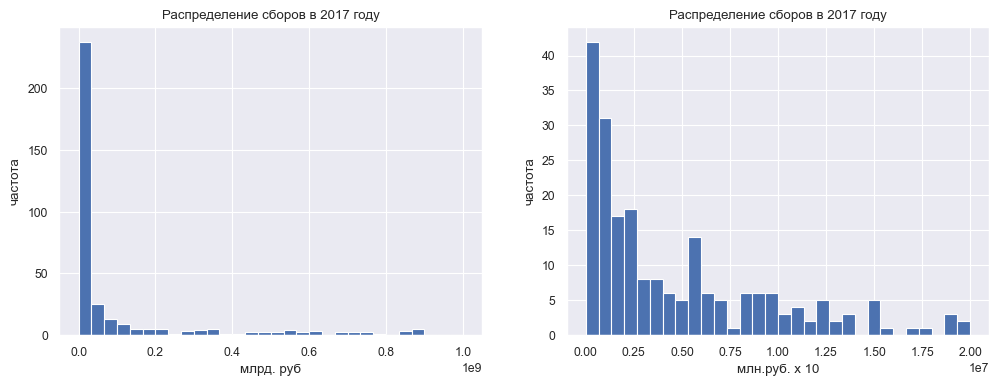

In [114]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
df.query('"2016" < show_start_year < "2018"')['box_office'].hist(bins=30, range=(0, 1_000_000_000))
plt.title('Распределение сборов в 2017 году')
plt.xlabel('млрд. руб')
plt.ylabel('частота')

plt.subplot(122)
df.query('"2016" < show_start_year < "2018"')['box_office'].hist(bins=30, range=(0, 20_000_000))
plt.title('Распределение сборов в 2017 году')
plt.xlabel('млн.руб. х 10')
plt.ylabel('частота');

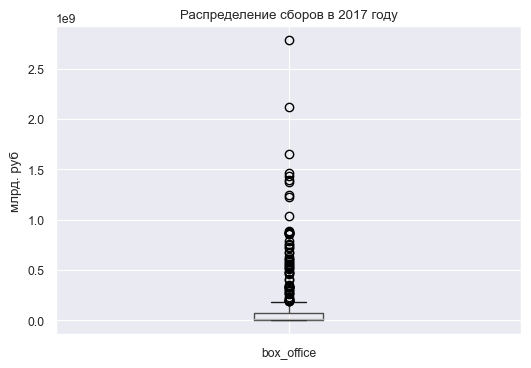

In [115]:
fig, ax = plt.subplots(figsize=(6, 4))
df.query('"2016" < show_start_year < "2018"').boxplot('box_office')
ax.set(title = 'Распределение сборов в 2017 году', ylabel = 'млрд. руб');

Большинство фильмов имеет небольшие сборы (не более 10 млн. руб.), но есть отдельные фильмы которые имеют сборы в сотни раз больше. За счет этого среднее превышает медиану в десятки раз (9.9 млн.р. и 136.5 млн.р.).

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [116]:
df.query('show_start_year > "2014"').groupby(['show_start_year', 'age_restriction'])['box_office']\
.agg('sum').unstack()

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_year,,,,,
2015,3.790546e+08,1.341951e+10,1.078160e+10,5.430351e+09,8.517312e+09
2016,1.502288e+08,1.115076e+10,1.659425e+10,6.793930e+09,1.205315e+10
2017,2.295989e+08,7.851428e+09,1.869459e+10,9.651496e+09,1.203103e+10
2018,3.244900e+07,1.426729e+10,1.627841e+10,8.760086e+09,9.913759e+09
2019,1.774607e+07,1.268020e+10,1.275342e+10,1.012180e+10,1.270494e+10


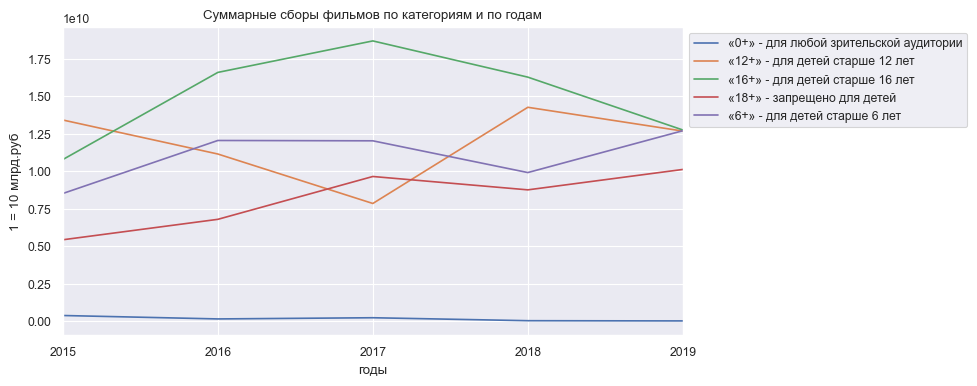

In [117]:
df.query('show_start_year > "2014"').groupby(['show_start_year', 'age_restriction'])['box_office']\
.agg('sum').unstack().plot(figsize=(8, 4))
plt.title('Суммарные сборы фильмов по категориям и по годам')
plt.legend(bbox_to_anchor=(1, 1));
plt.xlabel('годы')
plt.ylabel('1 = 10 млрд.руб');

Возрастное ограничение влияет на сборы фильмов. Сборы фильмов с возрастным ограничением 0+ стабильно минимальны. Это фильмы в которых нет ничего "острого", целевая уадитория таких фильмов минимальная и видимо по большей части детская.


Далее по возрастанию сборов следуют фильмы 18+. Эти фильмы с одной стороны более привлекательны для аудитории (там есть разное), но с другой - ограничивают эту целевую аудиторию. Подростки до 18, составляющие значительную часть аудитории, на эти фильмы не попадают.


Затем идут фильмы 6+ и 12+. Они уже более интересны и не особо отсекают целевую аудиторию.


Самые собирающие фильмы - это 16+. Они практически такие же как и 18+ по содержанию (близки к ним), но захватывают большую аудиторию подростков с 16 до 18 лет.


Эта картина меняется по годам. Фильмы 12+ в 2015 году были самыми собираемыми, затем упали ниже всех категорий кроме 0+ в 2017 году, после чего стали быстро расти. Фильмы 12+ двигались в противофазе с 16+, у них близкие целевые аудитории и происходило перетекание общей аудитории. Скорре всего это связано с ужесточением ограничений - всё больше фильмов с 2017 года переходило из 16+ в 12+ из-за роста ограничений.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Для исследования фильмов, которые получили господдержку и для сравнения с другими фильмами, разделим данные на 2 части: фильмы с господдержкой и без неё.

In [118]:
df['budget'].isna().sum()

7154

In [119]:
df['budget'].count()

315

In [120]:
len(df['budget'])

7469

Данные можно разделить по столбцу 'budget'. Фильмы с господдержкой имеют бюджет, а фильмы без господдержки в этом столбце имеют пропущенные данные.

In [121]:
df_support = df.query('budget > 0') # данные о фильмах с господдержкой

In [122]:
df_nosupport = df[~(df['budget'] > 0)] # данные о фильмах без господдержки

In [123]:
len(df_support['budget'])

315

In [124]:
len(df_nosupport['budget'])

7154

In [151]:
# сложим господдержку с возвратными средствами и невозвратными, чтобы иметь столобец с суммарной господдержкой
df_support.loc[:, 'total_support'] = df_support[['refundable_support', 'nonrefundable_support']].sum(axis=1)

Оценим количество средств, которое выделяется на господдержку по годам и бюджеты фильмов

In [126]:
t = df_support.groupby('show_start_year')[['total_support', 'budget']].sum().reset_index()
t

,show_start_year,total_support,budget
0,2013,1.343479e+08,2.554354e+08
1,2014,5.490023e+08,1.279485e+09
2,2015,3.227241e+09,7.309669e+09
3,2016,3.977155e+09,7.228943e+09
4,2017,3.098972e+09,6.972173e+09
5,2018,3.098000e+09,6.651695e+09
6,2019,4.724000e+09,1.254287e+10


In [127]:
t.loc[6, 'total_support'] / t.loc[0, 'total_support']

35.162428424193614

In [128]:
t.loc[6, 'budget'] / t.loc[0, 'budget']

49.10387166398517

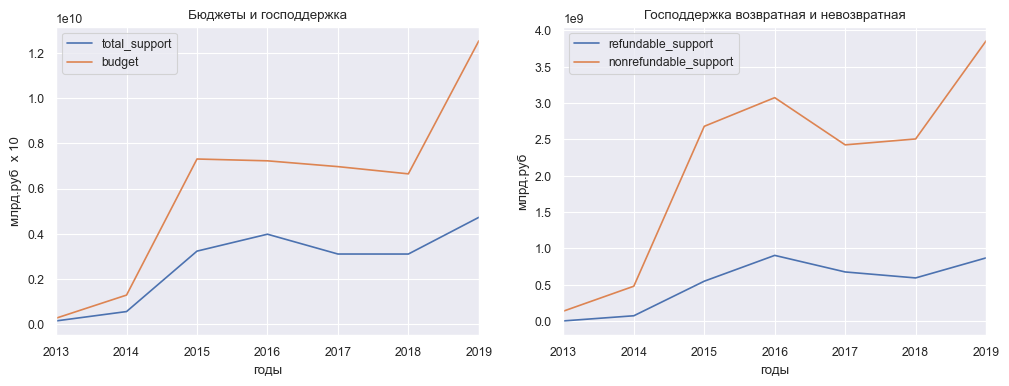

In [129]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))

df_support.groupby('show_start_year')[['total_support', 'budget']].sum().plot(ax=ax[0])
ax[0].set(title = 'Бюджеты и господдержка', xlabel = 'годы', ylabel = 'млрд.руб  х 10')

df_support.groupby('show_start_year')[['refundable_support', 'nonrefundable_support']].sum().plot(ax=ax[1])
ax[1].set(title = 'Господдержка возвратная и невозвратная', xlabel = 'годы', ylabel = 'млрд.руб');

In [130]:
df_support['nonrefundable_support'].sum() / df_support['refundable_support'].sum()

4.1460243083447335

Господдержка фильмов на 2019 год составляла около 12 млрд. руб. Она выросла с 2013 года по 2019 в 35 раза. Суммарные бюджеты фильмов выросли за это время в 49 раз. Невозвратная господдержка превышает возвратную в среднем в 4 раза. 

Рассмотрим сборы фильмов с господдержкой, сравним эти сборы с размером господдержки и размером бюджета

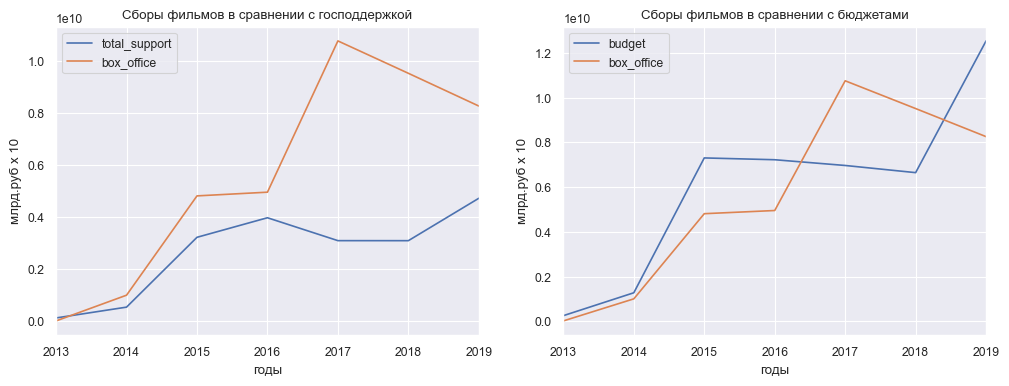

In [131]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))

df_support.groupby('show_start_year')[['total_support', 'box_office']].sum().plot(ax=ax[0])
ax[0].set(title = 'Сборы фильмов в сравнении с господдержкой', xlabel = 'годы', ylabel = 'млрд.руб х 10')

df_support.groupby('show_start_year')[['budget', 'box_office']].sum().plot(ax=ax[1]);
ax[1].set(title = 'Сборы фильмов в сравнении с бюджетами', xlabel = 'годы', ylabel = 'млрд.руб х 10');

Сборы фильмов примерно в 2 раза превышают господдержку. Сборы и бюджеты фильмов соизмеримы. Но сборы несколько ниже, чаще всего бюджеты не окупаются - сборы превышали бюджеты фильмов в 2017 и 2018 годах. Можно сказать, что в целом фильмы с господдержкой не приносят прибыли.

Сравним сборы фильмов с господдержкой и без неё.

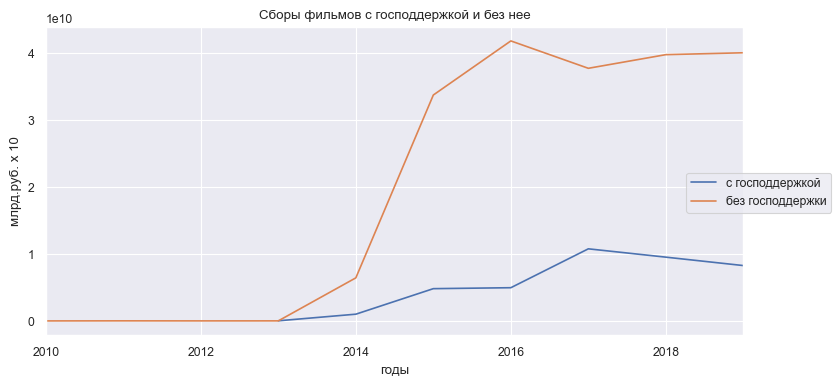

In [132]:
fig, ax = plt.subplots(figsize=(9, 4))
df_support.groupby('show_start_year')[['box_office']].sum().plot(ax=ax)
df_nosupport.groupby('show_start_year')[['box_office']].sum().plot(ax=ax);
ax.set(title = 'Сборы фильмов с господдержкой и без нее', xlabel = 'годы', ylabel = 'млрд.руб. х 10')
ax.get_legend().remove()
fig.legend(('с господдержкой', 'без господдержки'), loc=('right'));

Сборы фильмов без господдержки в несколько раз превышают сборы фильмов с господдержкой.


Рассмотрим средний сбор на 1 фильм для этих групп фильмов.

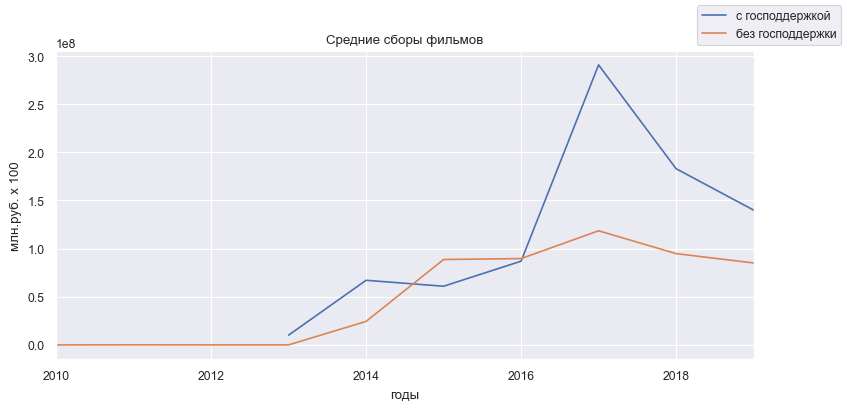

In [133]:
fig, ax = plt.subplots(figsize=(9, 4))
df_support.groupby('show_start_year')[['box_office']].mean().plot(ax=ax);
df_nosupport.groupby('show_start_year')[['box_office']].mean().plot(ax=ax);
ax.set(title = 'Средние сборы фильмов', xlabel = 'годы', ylabel = 'млн.руб. х 100')
ax.get_legend().remove()
fig.legend(('с господдержкой', 'без господдержки'),  loc=('upper right'));

In [134]:
df_support['box_office'].describe() #Средние сборы фильмов с господдержкой, статистика

count    3.010000e+02
mean     1.306983e+08
std      3.391903e+08
min      1.550000e+03
25%      1.067649e+06
50%      1.274840e+07
75%      1.031348e+08
max      3.073569e+09
Name: box_office, dtype: float64

In [135]:
df_nosupport['box_office'].describe() #Средние сборы фильмов без господдержки, статистика

count    2.840000e+03
mean     7.021346e+07
std      2.265650e+08
min      0.000000e+00
25%      5.104110e+04
50%      1.964822e+06
75%      1.910484e+07
max      2.576614e+09
Name: box_office, dtype: float64

Средние сборы фильмов с господдержкой (ок. 133 млн.руб.) существенно выше, чем сборы фильмов без неё (ок 74 млн.руб.). Но количество фильмов без господдержки значительно больше, поэтому их суммарные сборы выше.


Если средние сборы фильмов с господдержкой выше (чем без господдержки), то видимо и рейтинг таких фильмов должен быть выше. Проверим эту гипотезу.

Для этого переведём данные столбца 'ratings' в тип данных float. Для чего удалим данные с процентами и пропуски в данных.

In [136]:
df_support['ratings'].sort_values().unique()

array(['1.0', '2.5', '2.8', '2.9', '3.0', '3.1', '3.2', '3.3', '3.5',
       '3.8', '3.9', '4.0', '4.2', '4.3', '4.5', '4.6', '4.7', '4.8',
       '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7',
       '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4', '6.5', '6.6',
       '6.7', '6.8', '6.9', '7.0', '7.1', '7.2', '7.3', '7.4', '7.5',
       '7.6', '7.7', '7.8', '7.9', '8.0', '8.1', '8.2', '8.5', '90%',
       '94%', nan], dtype=object)

In [137]:
df_support['ratings'].isna().sum()

15

In [138]:
df_support = df_support.query('ratings not in ["90%", "94%"]')

In [139]:
df_support = df_support.dropna(subset =['ratings'])

In [140]:
df_support['ratings'] = df_support['ratings'].astype('float64')

In [141]:
df_support['ratings'].dtype

dtype('float64')

In [142]:
df_support['ratings'].sort_values().unique()

array([1. , 2.5, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.5, 3.8, 3.9, 4. , 4.2,
       4.3, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.5])

In [143]:
df_nosupport['ratings'].sort_values().unique()

array(['1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9',
       '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '28%',
       '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8',
       '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7',
       '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6',
       '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4', '6.5',
       '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%', '8.0',
       '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9',
       '83%', '88%', '89%', '9.0', '9.1', '9.2', '91%', '94%', '97%',
       '98%', '99%', nan], dtype=object)

In [144]:
df_nosupport = df_nosupport\
.query("ratings not in ['19%','28%','62%','64%','79%','83%','88%','89%','91%','94%','97%','98%','99%']")

In [145]:
df_nosupport = df_nosupport.dropna(subset =['ratings'])

In [146]:
df_nosupport['ratings'] = df_nosupport['ratings'].astype('float64')

In [147]:
df_nosupport['ratings'].sort_values().unique()

array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2])

Рассмотрим динамику среднего рейтинга для фильмов с господдержкой и без неё.

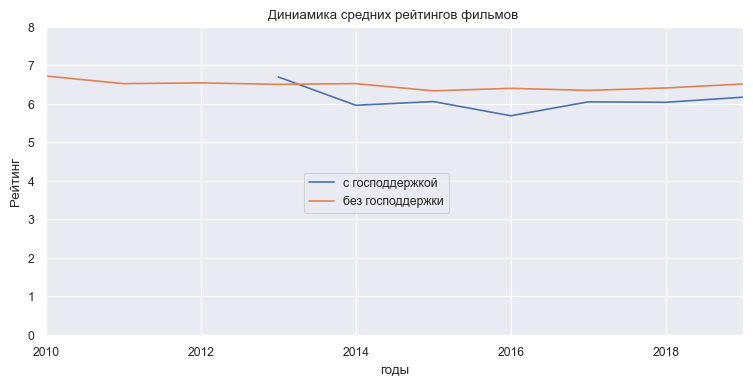

In [148]:
fig, ax = plt.subplots(figsize=(9, 4))
df_support.groupby('show_start_year')[['ratings']].mean().plot(ax=ax)
df_nosupport.groupby('show_start_year')[['ratings']].mean().plot(ax=ax)
ax.set(title = 'Диниамика средних рейтингов фильмов ', xlabel = 'годы', ylabel = 'Рейтинг')
ax.get_legend().remove()
fig.legend(('с господдержкой', 'без господдержки'),  loc='center')
plt.grid(True)
plt.ylim(0,8);

In [149]:
df_support['ratings'].describe()

count    298.000000
mean       6.015436
std        1.133406
min        1.000000
25%        5.400000
50%        6.200000
75%        6.700000
max        8.500000
Name: ratings, dtype: float64

In [150]:
df_nosupport['ratings'].describe()

count    6176.000000
mean        6.503578
std         1.095038
min         1.100000
25%         5.900000
50%         6.600000
75%         7.300000
max         9.200000
Name: ratings, dtype: float64

Рейтинги фильмов в с господдержкой немного ниже фильмов без господдержки (в среднем 6.0 против 6.5). Это не стыкуется с тем, что средние сборы фильмов с господдержкой почти в 2 раза выше, чем фильмов без господдержки. Получается, что этом случае более высокие сборы объясняются не выбором зрителей, а другими факторами. Возможно фильмы с господдержкой сильнее рекламируются и дольше находятся в прокате.

### Шаг 5. Напишите общий вывод

В рамках исследования мы проделали следующую работу:
1. Прочитали данные из двух датафреймов, изменили тип данных для объединения и объединили два датафрейма. Получили первую информацию о данных. 


2. В части предобработки данных мы выполнили следующее:
- проанализировали и преобразовали типы данных; 
- проанализировали пропуски в данных. Оставили без заполнения те столбцы, заполнять которые не нашли оснований;
- проанализировали дубликаты. В большинстве категориальных столбцов были удалены дубли, связанные с пробелом в начале и конце строки и регистром. Это массовое явление в категориальных данных. Причина дублей, скорее всего, - это ошибки людей при заполнении данных и не "строгие" формы заполнения;
- проанализировали категориальные столбцы. Общая проблема, которая встречается почти во всех категориальных столбцах - это пробелы в начале или конце строки и написание одних и тех же слов в разном регистре. Кроме этого в категориальных столбцах встречаются следующие проблемы: наличие в некоторых словах знака "нижнее подчеркивание", различное написание одних и тех же иностранных слов кирилицей, написание слов через дефис с пробелом и без пробела;
- проанализировали количественные столбцы. Обнаружили и удалили недостоверные данные в столбце "budget". Количественные данные представляются достоверными за исключение столбца box_office. Вызывает сомнение большое количество аномально низких сборов, это скорее всего объясняется тем, что до 2014 года данные о сборах учитвались не правильно: не полностьб и/или не в тех единицах измерения. Сборы в 2018 году превышают сборы 2010 года более чем в 20 тыс. раз. Существует слабая корреляция между бюджетом и сборами фильма; 
- добавили новые столбцы с использованием функции для одной строки и в итоге подготовили данные к исследованию.


В результате исследования мы пришли к следующим выводам:

1. Сумма сборов фильмов до 2014 года была очень низкой, затем резко выросла в 2014 и 2015 годах. Скорее всего это связано с учетом, ранее не все сборы учитывались. С 2016 по 2019 год сумма сборов существенно не менялась. Минимум был в 2010 году, максимум - в 2018.


2. Большинство фильмов имеет небольшие сборы - не более 10 млн. руб., но есть отдельные фильмы которые имеют сборы в сотни раз больше. За счет этого среднее существенно превышает медиану (9.9 млн.р. и 136.5 млн.р. соответственно).


3. Возрастное ограничение влияет на сборы фильмов. 


- Сборы фильмов с возрастным ограничением 0+ стабильно минимальны. Это фильмы в которых нет ничего "острого", целевая уадитория таких фильмов минимальная и видимо по большей части детская. 


- Далее по возрастанию сборов следуют фильмы 18+. Эти фильмы с одной стороны более привлекательны для аудитории (там есть разное), но с другой - ограничивают эту целевую аудиторию. Подростки до 18, составляющие значительную часть аудитории, на эти фильмы не попадают. Затем идут фильмы 6+ и 12+. Они уже более интересны и не особо отсекают целевую аудиторию.


- Самые собирающие фильмы - это 16+. Они практически такие же как и 18+ по содержанию (близки к ним), но захватывают большую аудиторию подростков с 16 до 18 лет.


- Эта картина меняется по годам. Фильмы 12+ в 2015 году были самыми собираемыми, затем упали ниже всех категорий кроме 0+ в 2017 году, после чего стали быстро расти. Фильмы 12+ двигались в противофазе с 16+, у них близкие целевые аудитории и происходило перетекание общей аудитории. Скорре всего это связано с ужесточением ограничений - всё больше фильмов с 2017 года переходило из 16+ в 12+ из-за роста ограничений.


4. Господдержка фильмов на 2019 год составляла около 12 млрд. руб. Она выросла с 2013 года по 2019 в 35 раза. Суммарные бюджеты фильмов выросли за это время в 49 раз. Невозвратная господдержка превышает возвратную в среднем в 4 раза.


5. Сборы фильмов примерно в 2 раза превышают господдержку. Сборы и бюджеты фильмов соизмеримы. Но сборы несколько ниже, чаще всего бюджеты фильмов не окупаются - сборы превышали бюджеты фильмов в 2017 и 2018 годах. Можно сказать, что в целом фильмы с господдержкой не приносят прибыли.


6. Сборы фильмов без господдержки в несколько раз превышают сборы фильмов с господдержкой. Средние сборы фильмов с господдержкой (ок. 133 млн.руб.) существенно выше, чем сборы фильмов без неё (ок 74 млн.руб.). Но количество фильмов без господдержки значительно больше, поэтому их суммарные сборы выше.


7. Рейтинги фильмов в с господдержкой немного ниже фильмов без господдержки (в среднем 6.0 против 6.5). Это не стыкуется с тем, что средние сборы фильмов с господдержкой почти в 2 раза выше, чем фильмов без господдержки. Получается, что этом случае более высокие сборы объясняются не выбором зрителей, а другими факторами. Возможно фильмы с господдержкой сильнее рекламируются и/или дольше находятся в прокате.